In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras.backend as K
#from matplotlib import pyplot as plt
#tf.K.set_image_data_format(‘channels_last’)
tf.keras.backend.set_image_data_format('channels_last')
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import imshow
path = '/content/drive/MyDrive/base_dir/train_dir'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 25591 images belonging to 7 classes.


In [ ]:
import keras

In [ ]:
type(train)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 7)
Image Size of first image :  (227, 227, 3)
Output of first image :  (7,)


In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(7,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model
alex = AlexNet(train[0][0].shape[1:])
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
path1 = '/content/drive/MyDrive/base_dir/test_dir/val_dir'
val_datagen = ImageDataGenerator(rescale=1. / 255)
val = val_datagen.flow_from_directory(path1, target_size=(227,227), class_mode='categorical')
type(val)
type(val_datagen)

Found 2003 images belonging to 7 classes.


tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [ ]:
#testing
path_test = '/content/drive/MyDrive/base_dir/test_dir/testing_dir'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 2004 images belonging to 7 classes.


In [10]:
#with epochs 20 and confusion matrix
opt = keras.optimizers.Adam(learning_rate=0.0001)
alex.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history20=alex.fit(train,epochs=20,validation_data=(val))

Epoch 1/20
800/800 [==============================] - 11245s 14s/step - loss: 1.1510 - accuracy: 0.5762 - val_loss: 0.8298 - val_accuracy: 0.6900
Epoch 2/20
800/800 [==============================] - 142s 177ms/step - loss: 0.7857 - accuracy: 0.6996 - val_loss: 0.8537 - val_accuracy: 0.7239
Epoch 3/20
800/800 [==============================] - 140s 175ms/step - loss: 0.6278 - accuracy: 0.7632 - val_loss: 1.0549 - val_accuracy: 0.6965
Epoch 4/20
800/800 [==============================] - 141s 176ms/step - loss: 0.5276 - accuracy: 0.8008 - val_loss: 1.0262 - val_accuracy: 0.6660
Epoch 5/20
800/800 [==============================] - 140s 176ms/step - loss: 0.4308 - accuracy: 0.8362 - val_loss: 1.1666 - val_accuracy: 0.6985
Epoch 6/20
800/800 [==============================] - 141s 176ms/step - loss: 0.3631 - accuracy: 0.8626 - val_loss: 0.8125 - val_accuracy: 0.7209
Epoch 7/20
800/800 [==============================] - 141s 176ms/step - loss: 0.3085 - accuracy: 0.8839 - val_loss: 1.6337 -

In [ ]:
# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

63/63 [==============================] - 996s 16s/step


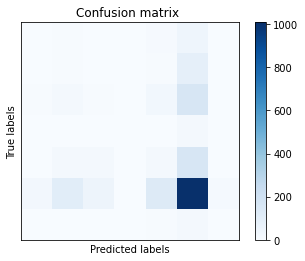

Confusion: [[   2    5    1    0   10   46    1]
 [   0    7    1    1    5   89    0]
 [   4   23    6    0   28  158    1]
 [   0    0    1    0    1   21    0]
 [   3   23   16    0   17  161    2]
 [  27  108   51    3  133 1008   12]
 [   0    2    1    0    6   20    0]]
Accuracy :  0.004491017964071856
Accuracy 2: 0.5189620758483033
Sensitivity :  0.2857142857142857
Specificity :  1.0
Recall [0.03076923 0.06796117 0.02727273 0.         0.07657658 0.75111773
 0.        ]
Precision [0.05555556 0.04166667 0.07792208 0.         0.085      0.67065868
 0.        ]
F1 [0.03960396 0.05166052 0.04040404 0.         0.08056872 0.7086116
 0.        ]


In [11]:
predictions = alex.predict(test,verbose=1)  #for confusion metric
#6
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
test_labels=test.classes
cm1=confusion_matrix(test_labels, predictions.argmax(axis=1))
# or
#cm = np.array([[1401,    0],[1112, 0]])
cm1_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']
plt.imshow(cm1, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()


#plot_confusion_matrix(cm, cm_plot_labels)
# Confusion Matrix

# Accuracy
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(test_labels, predictions.argmax(axis=1))
# Recall
from sklearn.metrics import recall_score
RecallScore=recall_score(test_labels, predictions.argmax(axis=1), average=None)
# Precision
from sklearn.metrics import precision_score
Precision=precision_score(test_labels, predictions.argmax(axis=1), average=None)
from sklearn.metrics import f1_score
F1=f1_score(test_labels, predictions.argmax(axis=1), average=None)
total1=sum(sum(cm1))
print("Confusion:",cm1)
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)
print("Accuracy 2:",Accuracy)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("Recall",RecallScore)
print("Precision",Precision)
print("F1",F1)

In [12]:
preds = alex.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
alex.save("model11.h5")

63/63 [==============================] - 20s 322ms/step - loss: 1.2813 - accuracy: 0.7320
Loss = 1.281312108039856
Test Accuracy = 0.7320359349250793


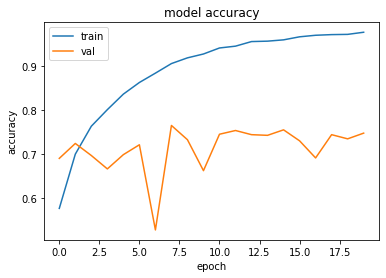

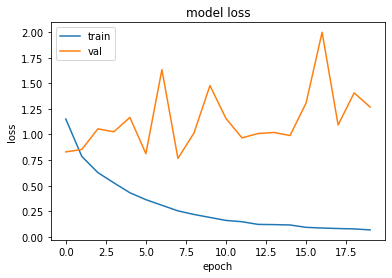

In [13]:
#with epochs 20
from matplotlib import pyplot as plt
plt.plot(history20.history['accuracy'])
plt.plot(history20.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#with epochs 7
plt.plot(history20.history['loss'])
plt.plot(history20.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()